In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import h5py
import os

from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from matplotlib.gridspec import GridSpec
mpl.rcParams['font.size']=18
mpl.rcParams['font.serif'] = "Bitstream Vera Serif"
mpl.rcParams['font.family'] = "serif"

import glob
from numpy.polynomial.legendre import legfit,legval

from sklearn.decomposition.pca import PCA
from sklearn.decomposition import NMF

In [109]:

def normalize(d,e, zero=True):
    x=d.copy()
    if zero:
        x-=x.min(-1)[:,None]
    return x/(x.max(-1)-x.min(-1))[:,None],e/(x.max(-1)-x.min(-1))[:,None]



In [146]:
f=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/nnmf_filtered_difcor/GDP_buf/run100_nnmf_filtered_0.h5','r')
filtered_buf=f['ave_cor'].value
filtered_buf_err=f['err'].value

f=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/nnmf_filtered_difcor/GDP_pro/run101_nnmf_filtered_0.h5','r')
filtered_pro=f['ave_cor'].value
filtered_pro_err=f['err'].value

filtered_diff = filtered_pro-filtered_buf
filtered_diff_err = np.sqrt(filtered_buf_err**2+filtered_pro_err**2)
filter_cpsi=f['interp_cpsi'].value


phi_offset=15
num_phi = 326
f=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/pca_denoise/cali_gai_filtered2/GDP_buf/run100_PCA-denoise_0.h5','r')
f2=h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/pca_denoise/cali_gai_filtered2/GDP_pro/run101_PCA-denoise_0.h5','r')
pro=[]
pro_err=[]


buf=[]
buf_err=[]
for qidx in range(36):
    nn=f['q%d'%qidx]['num_pca_cutoff'].value
    buf.append(f['q%d'%qidx]['pca%d'%nn]['train_difcor'][0])
    buf_err.append(f['q%d'%qidx]['pca%d'%nn]['train_difcor_err'][0, phi_offset:num_phi/2-phi_offset])
    nn=f['q%d'%qidx]['num_pca_cutoff'].value
    pro.append(f2['q%d'%qidx]['pca%d'%nn]['train_difcor'][0])
    pro_err.append(f2['q%d'%qidx]['pca%d'%nn]['train_difcor_err'][0, phi_offset:num_phi/2-phi_offset])
f.close()
f2.close()

pro=np.array(pro)
# pro = pro[:,:num_phi/2]+pro[]
pro-=pro.min(-1)[:,None]
pro_err=np.array(pro_err)
buf=np.array(buf)
buf-=buf.min(-1)[:,None]
buf_err = np.array(buf_err)

diff=pro-buf
diff = (diff[:,:num_phi/2]+diff[:,num_phi/2:])/2.
diff=diff[:, phi_offset:num_phi/2-phi_offset]
diff_err = np.sqrt(pro_err**2+buf_err**2)

cpsi = np.load('/reg/d/psdm/cxi/cxilr6716/results/nnmf_filter/exp_cpsi.npy')[:,phi_offset:num_phi/2-phi_offset]

In [112]:
norm_diff, norm_err=normalize(diff,diff_err)
norm_filtered_diff, norm_filtered_err=normalize(filtered_diff,filtered_diff_err)

<Container object of 3 artists>

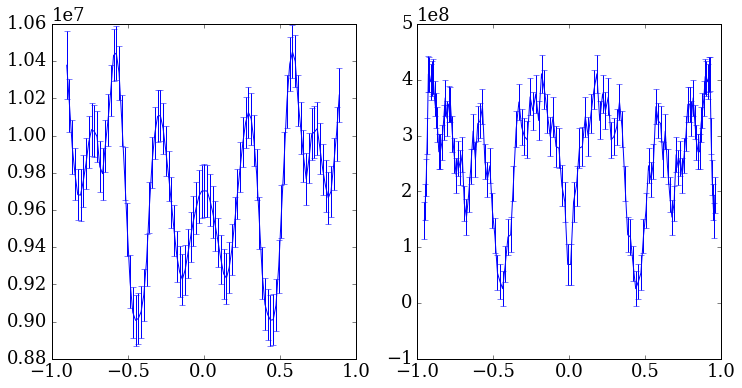

In [130]:
qidx=2
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.errorbar(filter_cpsi[qidx], filtered_diff[qidx],yerr=filtered_diff_err[qidx])
plt.subplot(122)
plt.errorbar(cpsi[qidx], diff[qidx],yerr=diff_err[qidx])

<Container object of 3 artists>

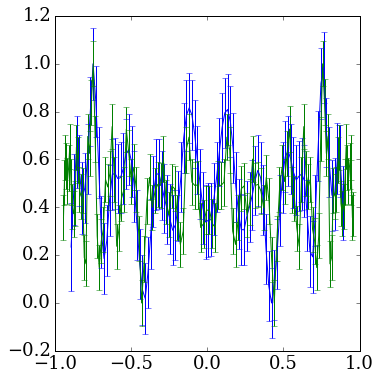

In [142]:
qidx=10
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.errorbar(filter_cpsi[qidx], norm_filtered_diff[qidx],yerr=norm_filtered_err[qidx])
# plt.subplot(122)
plt.errorbar(cpsi[qidx], norm_diff[qidx],yerr=norm_err[qidx])

In [124]:
filtered_snr= (filtered_diff-filtered_diff.min(-1)[:,None])/ filtered_diff_err 
snr = (diff-diff.min(-1)[:,None])/ diff_err

(0, 10)

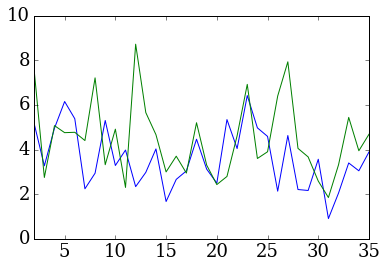

In [129]:
plt.plot(filtered_snr.mean(-1))
plt.plot(snr.mean(-1))
plt.xlim(2,35)
plt.ylim(0,10)

In [158]:
f= h5py.File('/reg/d/psdm/cxi/cxilr6716/scratch/nnmf_filtered_difcor/GDP_buf/run99_nnmf_filtered_0.h5','r')
x=f['ave_cor'].value
e = f['err'].value
# cpsi = f['interp_cpsi'].value


x2=f['unfiltered_ave_cor'].value
e2 = f['unfiltered_err'].value


<Container object of 3 artists>

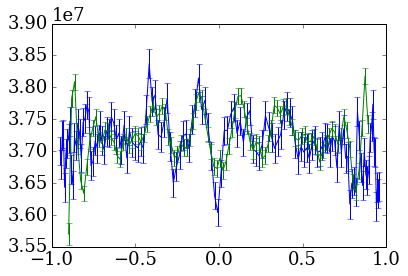

In [189]:
qidx=6
plt.errorbar(cpsi[qidx], x2[qidx], yerr=e2[qidx])
plt.errorbar(filter_cpsi[qidx], x[qidx], yerr=e[qidx])

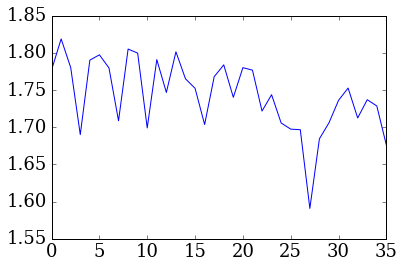

In [172]:
plt.plot(e2.mean(-1) /e.mean(-1))

In [154]:
cpsi.shape

(50, 133)

In [155]:
e2.shape

(36, 100)